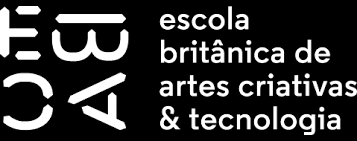

**Curso**: Cientista de Dados <br>
**Aluno**: Victor Resende

____________

# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

df

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402
5,4.231065,3.433002
6,9.807642,9.837325
7,6.848297,7.917613
8,4.809319,5.700025
9,3.921175,5.676061


In [8]:
# 1. Calculando a média e a diferença através de multiplicação matricial

# Dados de p1 e p2
dados = np.array([p1, p2])

# Matriz de transformação para obter a média e a diferença
transformacao = np.array([[0.5, 0.5], [0.5, -0.5]])

# Aplicando a transformação para obter média e diferença
media_diferenca = np.dot(transformacao, dados)

# Separando os resultados
media = media_diferenca[0]  # Primeira linha é a média
diferenca = media_diferenca[1]  # Segunda linha é a diferença

# 2. Calculando a correlação entre os dados p1 e p2
correlacao_original = np.corrcoef(p1, p2)[0, 1]

# 3. Calculando a correlação entre os dados transformados (média e diferença)
correlacao_transformada = np.corrcoef(media, diferenca)[0, 1]

# Exibindo as correlações
correlacao_original, correlacao_transformada


(0.8957365818728046, -0.13347385411788837)

### Análise:

Correlação entre p1 e p2 (dados originais):

Correlação = 0.896 (alta correlação positiva).
Correlação entre os dados transformados (média e diferença):

Correlação = -0.133 (correlação fraca e negativa).

Os dados originais (p1 e p2) têm uma alta correlação positiva porque p2 foi gerado com base em p1 mais um ruído.
Após a transformação para média e diferença, a correlação entre esses dados reduziu drasticamente. Isso ocorre porque, ao separar a média (componente comum) da diferença (variação), eliminamos a maior parte da dependência linear que existia entre os dados originais.

### Visualizando os dados:

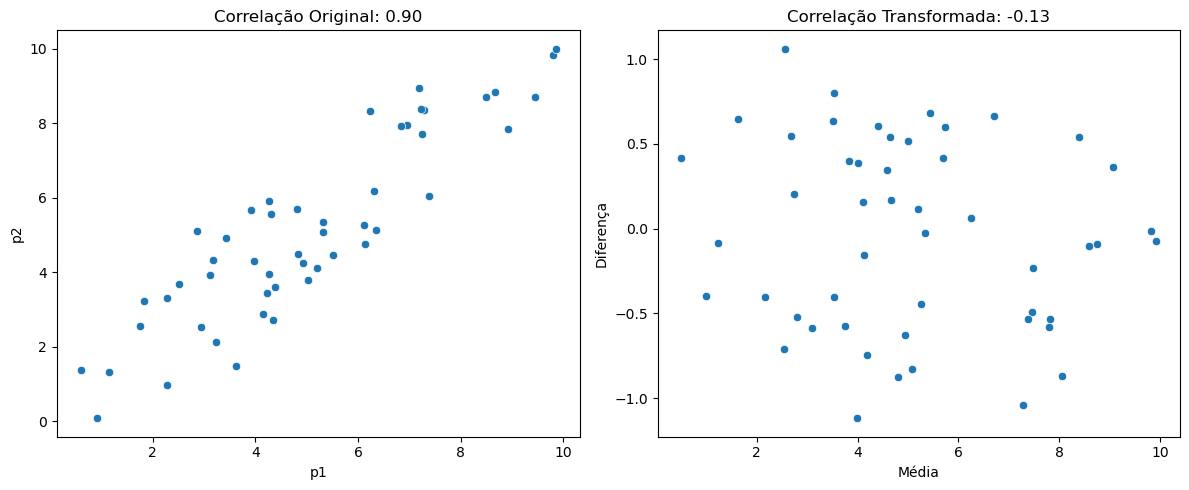

In [11]:
# Criando um DataFrame para os dados transformados
df_transformado = pd.DataFrame({'media': media, 'diferenca': diferenca})

# Plotando os gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico da correlação original entre p1 e p2
sns.scatterplot(x='p1', y='p2', data=df, ax=axs[0])
axs[0].set_title(f'Correlação Original: {correlacao_original:.2f}')
axs[0].set_xlabel('p1')
axs[0].set_ylabel('p2')

# Gráfico da correlação entre média e diferença
sns.scatterplot(x='media', y='diferenca', data=df_transformado, ax=axs[1])
axs[1].set_title(f'Correlação Transformada: {correlacao_transformada:.2f}')
axs[1].set_xlabel('Média')
axs[1].set_ylabel('Diferença')

plt.tight_layout()
plt.show()


## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

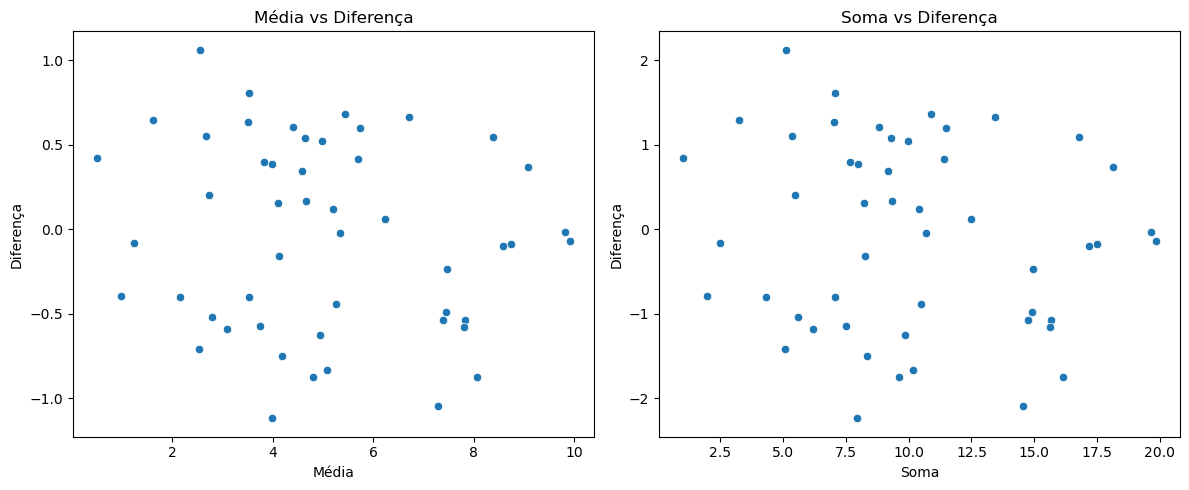

In [13]:
# Matriz de transformação para obter a soma e a diferença
transformacao_soma_diferenca = np.array([[1, 1], [1, -1]])

# Aplicando a transformação para obter soma e diferença
soma_diferenca = np.dot(transformacao_soma_diferenca, dados)

# Separando os resultados
soma = soma_diferenca[0]  # Primeira linha é a soma
diferenca_soma = soma_diferenca[1]  # Segunda linha é a diferença

# Criando um DataFrame para os dados transformados
df_soma_diferenca = pd.DataFrame({'soma': soma, 'diferenca': diferenca_soma})

# Plotando os gráficos para comparar
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico da média e diferença (transformação anterior)
sns.scatterplot(x='media', y='diferenca', data=df_transformado, ax=axs[0])
axs[0].set_title('Média vs Diferença')
axs[0].set_xlabel('Média')
axs[0].set_ylabel('Diferença')

# Gráfico da soma e diferença (nova transformação)
sns.scatterplot(x='soma', y='diferenca', data=df_soma_diferenca, ax=axs[1])
axs[1].set_title('Soma vs Diferença')
axs[1].set_xlabel('Soma')
axs[1].set_ylabel('Diferença')

plt.tight_layout()
plt.show()


### Análise:

Aqui podemos visualizar uma maior correlação e similaridade dos dados entre p1 e p2. 

____